## 进入 MMEditing 主目录

In [1]:
import os
os.chdir('mmediting')
os.listdir()

['.git',
 '.circleci',
 '.dele.yml',
 '.dev_scripts',
 '.github',
 '.gitignore',
 '.owners.yml',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'MANIFEST.in',
 'README.md',
 'README_zh-CN.md',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmedit',
 'model-index.yml',
 'projects',
 'requirements.txt',
 'requirements',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'mmedit.egg-info',
 'outputs',
 'data',
 'checkpoints',
 'work_dirs',
 'indexnet_mobv2_1x16_78k_comp1k_SAD-45.6_20200618_173817-26dd258d.pth']

## 检查推理支持的任务和模型

在编辑中有多种任务类型:抠图、修补、视频超分辨率、图像超分辨率、图像转图像、无条件GANs、有条件GANs、视频插帧。

我们为每个任务提供了一些模型。所有可用的模型和任务都可以打印出来。

In [2]:
from mmedit.edit import MMEdit

# print all supported models for inference.
inference_supported_models = MMEdit.get_inference_supported_models()
print('all supported models:')
print(inference_supported_models)

# print all supported tasks for inference.
supported_tasks = MMEdit.get_inference_supported_tasks()
print('all supported tasks:')
print(supported_tasks)

# print all supported models for one task, take image translation for example.
task_supported_models = MMEdit.get_task_supported_models('Image2Image')
print('translation models:')
print(task_supported_models)

all supported models:
['inst_colorization', 'biggan', 'sngan_proj', 'sagan', 'styleganv1', 'gca', 'global_local', 'aot_gan', 'pix2pix', 'cyclegan', 'esrgan', 'flavr', 'cain', 'edvr', 'disco_diffusion', 'eg3d']
all supported tasks:
['Text2Image, Image2Image, diffusion', 'Unconditional GANs', 'Video Interpolation', 'Video Super-Resolution', 'Inpainting', 'Matting', 'Image Super-Resolution', 'Conditional GANs', 'Colorization', 'Image2Image', '3D-aware Generation']
translation models:
['pix2pix', 'cyclegan']


## 下载图片和视频

In [3]:
# 创建存放素材的文件夹
!mkdir -p ./resources/input/translation
!mkdir -p ./resources/output/translation

In [4]:
# 查看所有资源
!python demo/download_inference_resources.py --print-all
# 查看所有任务类型
!python demo/download_inference_resources.py --print-task-type
# 查看特定任务的资源
!python demo/download_inference_resources.py --print-task 'Inpainting'
# 将所有资源下载到默认目录'../resources'
!python demo/download_inference_resources.py
# 下载一个任务的资源
!python demo/download_inference_resources.py --task 'Inpainting'
# 下载到您想要的目录
!python demo/download_inference_resources.py --root-dir 'resources'

all inference resources:
Matting
https://download.openmmlab.com/mmediting/resources/input/matting/GT05.jpg
https://download.openmmlab.com/mmediting/resources/input/matting/GT05_trimap.jpg
https://download.openmmlab.com/mmediting/resources/input/matting/readme.md
Inpainting
https://download.openmmlab.com/mmediting/resources/input/inpainting/bbox_mask.png
https://download.openmmlab.com/mmediting/resources/input/inpainting/celeba_test.png
https://download.openmmlab.com/mmediting/resources/input/inpainting/readme.md
Image Super-Resolution
https://download.openmmlab.com/mmediting/resources/input/restoration/000001.png
https://download.openmmlab.com/mmediting/resources/input/restoration/0901x2.png
https://download.openmmlab.com/mmediting/resources/input/restoration/readme.md
Image2Image Translation
https://download.openmmlab.com/mmediting/resources/input/translation/gt_mask_0.png
https://download.openmmlab.com/mmediting/resources/input/translation/readme.md
Video Interpolation
https://downlo

用两行python代码进行推理。 
有两个步骤: 首先，通过预先训练的模型名称创建一个MMEdit实例。
第二，用这个MMEdit实例推断自己的图片。转换后的图像将保存到result_out_dir。

In [5]:
from mmedit.edit import MMEdit

# 创建一个MMEdit实例
editor = MMEdit('pix2pix')
# 推断图像。需要输入图像路径和输出图像路径。
results = editor.infer(img='resources/input/translation/gt_mask_0.png', result_out_dir='resources/output/translation/tutorial_translation_pix2pix_res.jpg')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/pix2pix/refactor/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth


Downloading: "https://download.openmmlab.com/mmediting/pix2pix/refactor/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth" to /home/featurize/.cache/torch/hub/checkpoints/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth


02/21 15:37:35 - mmengine - WARNING - Failed to search registry with scope "mmedit" in the "Collate Functions" registry tree. As a workaround, the current "Collate Functions" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmedit" is a correct scope, or whether the registry is initialized.


/environment/miniconda3/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:163: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


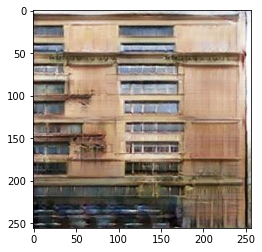

In [6]:
# 绘制结果图像
import mmcv
import matplotlib.pyplot as plt 
img = mmcv.imread('resources/output/translation/tutorial_translation_pix2pix_res.jpg')
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

## 使用特定模型的不同设置进行推断(运行时间稍长)

一个型号有一些不同的配置和检查点。 以条件GAN模型‘biggan’为例。我们为Cifar和Imagenet提供了预训练模型，所有预训练的“biggan”模型都列在其metafile.yaml中 

您可以通过将“model_setting”传递给“MMEdit”来配置不同的设置。每个模型的默认设置是0。

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/biggan/biggan_imagenet1k_128x128_b32x8_best_is_iter_1328000_20211111_122911-28c688bc.pth


Downloading: "https://download.openmmlab.com/mmediting/biggan/biggan_imagenet1k_128x128_b32x8_best_is_iter_1328000_20211111_122911-28c688bc.pth" to /home/featurize/.cache/torch/hub/checkpoints/biggan_imagenet1k_128x128_b32x8_best_is_iter_1328000_20211111_122911-28c688bc.pth


02/21 15:46:30 - mmengine - WARNING - Failed to search registry with scope "mmedit" in the "Collate Functions" registry tree. As a workaround, the current "Collate Functions" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmedit" is a correct scope, or whether the registry is initialized.


/environment/miniconda3/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:163: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


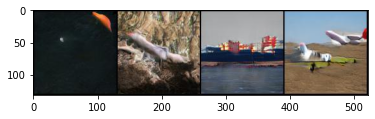

In [9]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

result_out_dir = 'resources/output/conditional/tutorial_conditinal_biggan_res_setting1.jpg'
# 将设置配置为1
editor = MMEdit('biggan', model_setting=1) 
results = editor.infer(label=1, result_out_dir=result_out_dir)

# 绘制结果图片
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

## 用额外参数推断

一些模型可能有额外的参数，可以配置这些参数来执行推理。 

以“biggan”为例。您可以在dict中配置“num_batches”并将其传递给“MMEdit”

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/biggan/biggan_imagenet1k_128x128_b32x8_best_is_iter_1328000_20211111_122911-28c688bc.pth
02/21 15:47:14 - mmengine - WARNING - Failed to search registry with scope "mmedit" in the "Collate Functions" registry tree. As a workaround, the current "Collate Functions" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmedit" is a correct scope, or whether the registry is initialized.


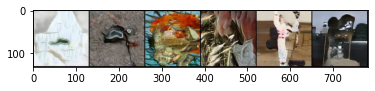

In [10]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

result_out_dir = 'resources/output/conditional/tutorial_conditinal_biggan_res_sample6.jpg'
# 使用dict来传递参数，num_batches表示一个推理的图像输出数量
editor = MMEdit('biggan', model_setting=1, extra_parameters={'num_batches':6}) 
results = editor.infer(label=1, result_out_dir=result_out_dir)

# 绘制结果图像，我们可以看到推理批次中有6个图像
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

知道一个模型有哪些额外的参数

In [11]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

editor = MMEdit('biggan', model_setting=1) 
editor.print_extra_parameters()
# “num_batches”和“sample_model”是“biggan”模型中的额外参数

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/biggan/biggan_imagenet1k_128x128_b32x8_best_is_iter_1328000_20211111_122911-28c688bc.pth
02/21 15:47:28 - mmengine - WARNING - Failed to search registry with scope "mmedit" in the "Collate Functions" registry tree. As a workaround, the current "Collate Functions" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmedit" is a correct scope, or whether the registry is initialized.
['num_batches', 'sample_model']
